In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('data/train_NewCustomer.csv', index_col='ID')
train_data.head(10)

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
ID,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,4,No,49.574949,80.41529544,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,4,No,49.574949,118.2802216,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,4,No,49.574949,81.69952126,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,4,No,49.574949,199.4580744,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,4,No,49.574949,41.42015309,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,4,No,49.574949,62.43017233,Good
0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,4,No,49.574949,178.3440674,Good
0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,4,No,49.574949,24.78521651,Standard
0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,1,No,18.816215,104.2918252,Standard


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              100000 non-null  object 
 1   Month                    100000 non-null  object 
 2   Name                     90015 non-null   object 
 3   Age                      100000 non-null  object 
 4   SSN                      100000 non-null  object 
 5   Occupation               100000 non-null  object 
 6   Annual_Income            100000 non-null  object 
 7   Monthly_Inhand_Salary    84998 non-null   float64
 8   Num_Bank_Accounts        100000 non-null  int64  
 9   Num_Credit_Card          100000 non-null  int64  
 10  Num_of_Loan              100000 non-null  object 
 11  Payment_of_Min_Amount    100000 non-null  object 
 12  Total_EMI_per_month      100000 non-null  float64
 13  Amount_invested_monthly  95521 non-null   object 
 14  Cre

# EXPLORATORY DATA ANALYSIS

In [4]:
train_data.drop(columns=['SSN', 'Name'], axis=1, inplace=True)

In [5]:
# Categorical Cols
categorical_cols = [c for c in train_data.columns if train_data[c].dtype == 'object']

In [6]:
for col in categorical_cols:
    print(f"Unique Values of {col}")
    print(train_data[col].unique())
    print("==================================================")

Unique Values of Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Unique Values of Month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Unique Values of Age
['23' '-500' '28_' ... '4808_' '2263' '1342']
Unique Values of Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Unique Values of Annual_Income
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Unique Values of Num_of_Loan
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1

In [7]:
for col in categorical_cols:
    train_data[col] = train_data[col].str.strip('_')

    try:
        train_data[col] = train_data[col].astype('float64')
    except:
        train_data[col] = train_data[col]
        

for col in categorical_cols:
    train_data[col] = train_data[col].replace({'':np.nan})

    try:
        train_data[col] = train_data[col].astype('float64')
    except:
        train_data[col] = train_data[col]

for col in categorical_cols:
    train_data[col] = train_data[col].replace({'!@9#%8':np.nan, '#F%$D@*&8':np.nan})

In [8]:
train_data[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              100000 non-null  object 
 1   Month                    100000 non-null  object 
 2   Age                      100000 non-null  float64
 3   Occupation               92938 non-null   object 
 4   Annual_Income            100000 non-null  float64
 5   Num_of_Loan              100000 non-null  float64
 6   Payment_of_Min_Amount    100000 non-null  object 
 7   Amount_invested_monthly  95521 non-null   float64
 8   Credit_Score             100000 non-null  object 
dtypes: float64(4), object(5)
memory usage: 7.6+ MB


In [9]:
numerical_cols = [col for col in train_data.columns if (train_data[col].dtype == 'int64') | (train_data[col].dtype == 'float64')]

for x in list(numerical_cols):
    q75,q25 = np.percentile(train_data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_data.loc[train_data[x] < min,x] = np.nan
    train_data.loc[train_data[x] > max,x] = np.nan

<AxesSubplot: >

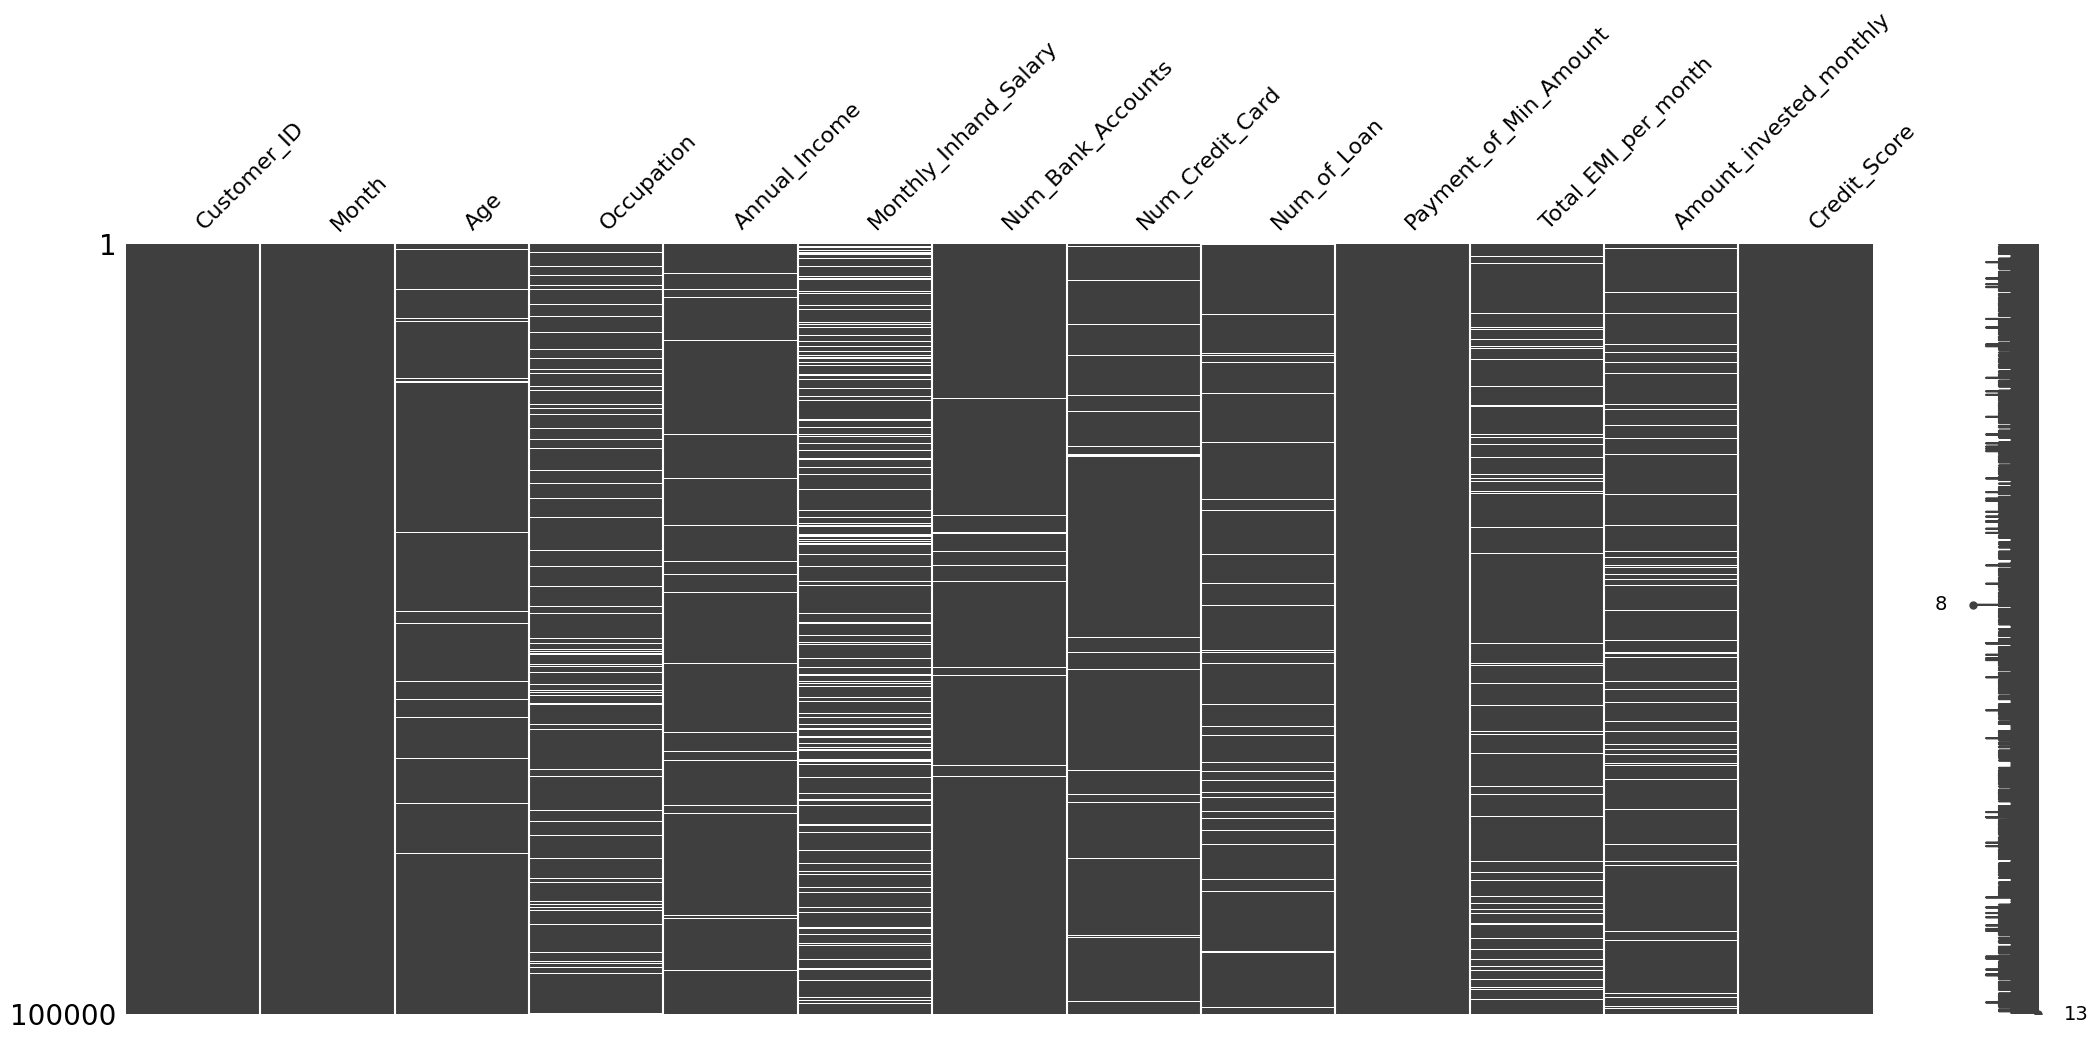

In [10]:
msno.matrix(train_data)

In [11]:
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing

Age                         2781
Occupation                  7062
Annual_Income               2783
Monthly_Inhand_Salary      15002
Num_Bank_Accounts           1315
Num_Credit_Card             2271
Num_of_Loan                 4348
Total_EMI_per_month         6795
Amount_invested_monthly     4479
dtype: int64

In [12]:
missing_cols = [col for col in missing.index]
missing_cols.append('Customer_ID')
missing_cols

['Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Num_of_Loan',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Customer_ID']

In [13]:
missing_cols_set = set(missing_cols)
missing_cols_set

{'Age',
 'Amount_invested_monthly',
 'Annual_Income',
 'Customer_ID',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Num_of_Loan',
 'Occupation',
 'Total_EMI_per_month'}

In [14]:
# numerical cols with missing values
numerical_cols_set = {col for col in train_data.columns if (train_data[col].dtype=='int64') | (train_data[col].dtype=='float64')}
numerical_cols_missing = [col for col in numerical_cols_set.intersection(missing_cols_set)]
numerical_cols_missing.append('Customer_ID')

In [15]:
numerical_cols_missing

['Total_EMI_per_month',
 'Monthly_Inhand_Salary',
 'Num_of_Loan',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Amount_invested_monthly',
 'Num_Credit_Card',
 'Age',
 'Customer_ID']

In [16]:
train_data[numerical_cols_missing].head(50)

,Total_EMI_per_month,Monthly_Inhand_Salary,Num_of_Loan,Annual_Income,Num_Bank_Accounts,Amount_invested_monthly,Num_Credit_Card,Age,Customer_ID
ID,,,,,,,,,
0x1602,49.574949,1824.843333,4.0,19114.12,3.0,80.415295,4.0,23.0,CUS_0xd40
0x1603,49.574949,NaN,4.0,19114.12,3.0,118.280222,4.0,23.0,CUS_0xd40
0x1604,49.574949,NaN,4.0,19114.12,3.0,81.699521,4.0,NaN,CUS_0xd40
0x1605,49.574949,NaN,4.0,19114.12,3.0,199.458074,4.0,23.0,CUS_0xd40
0x1606,49.574949,1824.843333,4.0,19114.12,3.0,41.420153,4.0,23.0,CUS_0xd40
0x1607,49.574949,NaN,4.0,19114.12,3.0,62.430172,4.0,23.0,CUS_0xd40
0x1608,49.574949,1824.843333,4.0,19114.12,3.0,178.344067,4.0,23.0,CUS_0xd40
0x1609,49.574949,1824.843333,4.0,19114.12,3.0,24.785217,4.0,23.0,CUS_0xd40
0x160e,18.816215,3037.986667,1.0,34847.84,2.0,104.291825,4.0,28.0,CUS_0x21b1


In [17]:
numerical_cols_missing.pop()

'Customer_ID'

In [18]:
based_customer_ID = [col for col in numerical_cols if train_data[col].head(8).nunique() == 1]
non_based_customer_ID = [col for col in numerical_cols if train_data[col].head(8).nunique() != 1]

In [19]:
based_customer_ID, non_based_customer_ID

(['Age',
  'Annual_Income',
  'Monthly_Inhand_Salary',
  'Num_Bank_Accounts',
  'Num_Credit_Card',
  'Num_of_Loan',
  'Total_EMI_per_month'],
 ['Amount_invested_monthly'])

In [20]:
train_data[based_customer_ID] = train_data.groupby(by=['Customer_ID'])[based_customer_ID].transform('median')
train_data[non_based_customer_ID] = train_data[non_based_customer_ID].fillna(method='bfill')

In [21]:
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing

Occupation             7062
Annual_Income          1800
Total_EMI_per_month    2376
dtype: int64

In [22]:
missing_cols_set = {col for col in missing.index}

In [23]:
categorical_cols_set = {col for col in train_data.columns if train_data[col].dtype == 'object'}
categorical_cols_set

{'Credit_Score', 'Customer_ID', 'Month', 'Occupation', 'Payment_of_Min_Amount'}

In [24]:
categorical_cols_missing = [col for col in categorical_cols_set.intersection(missing_cols_set)]
categorical_cols_missing

['Occupation']

In [25]:
train_data[categorical_cols_missing] = train_data[categorical_cols_missing].fillna(method='bfill')

<AxesSubplot: >

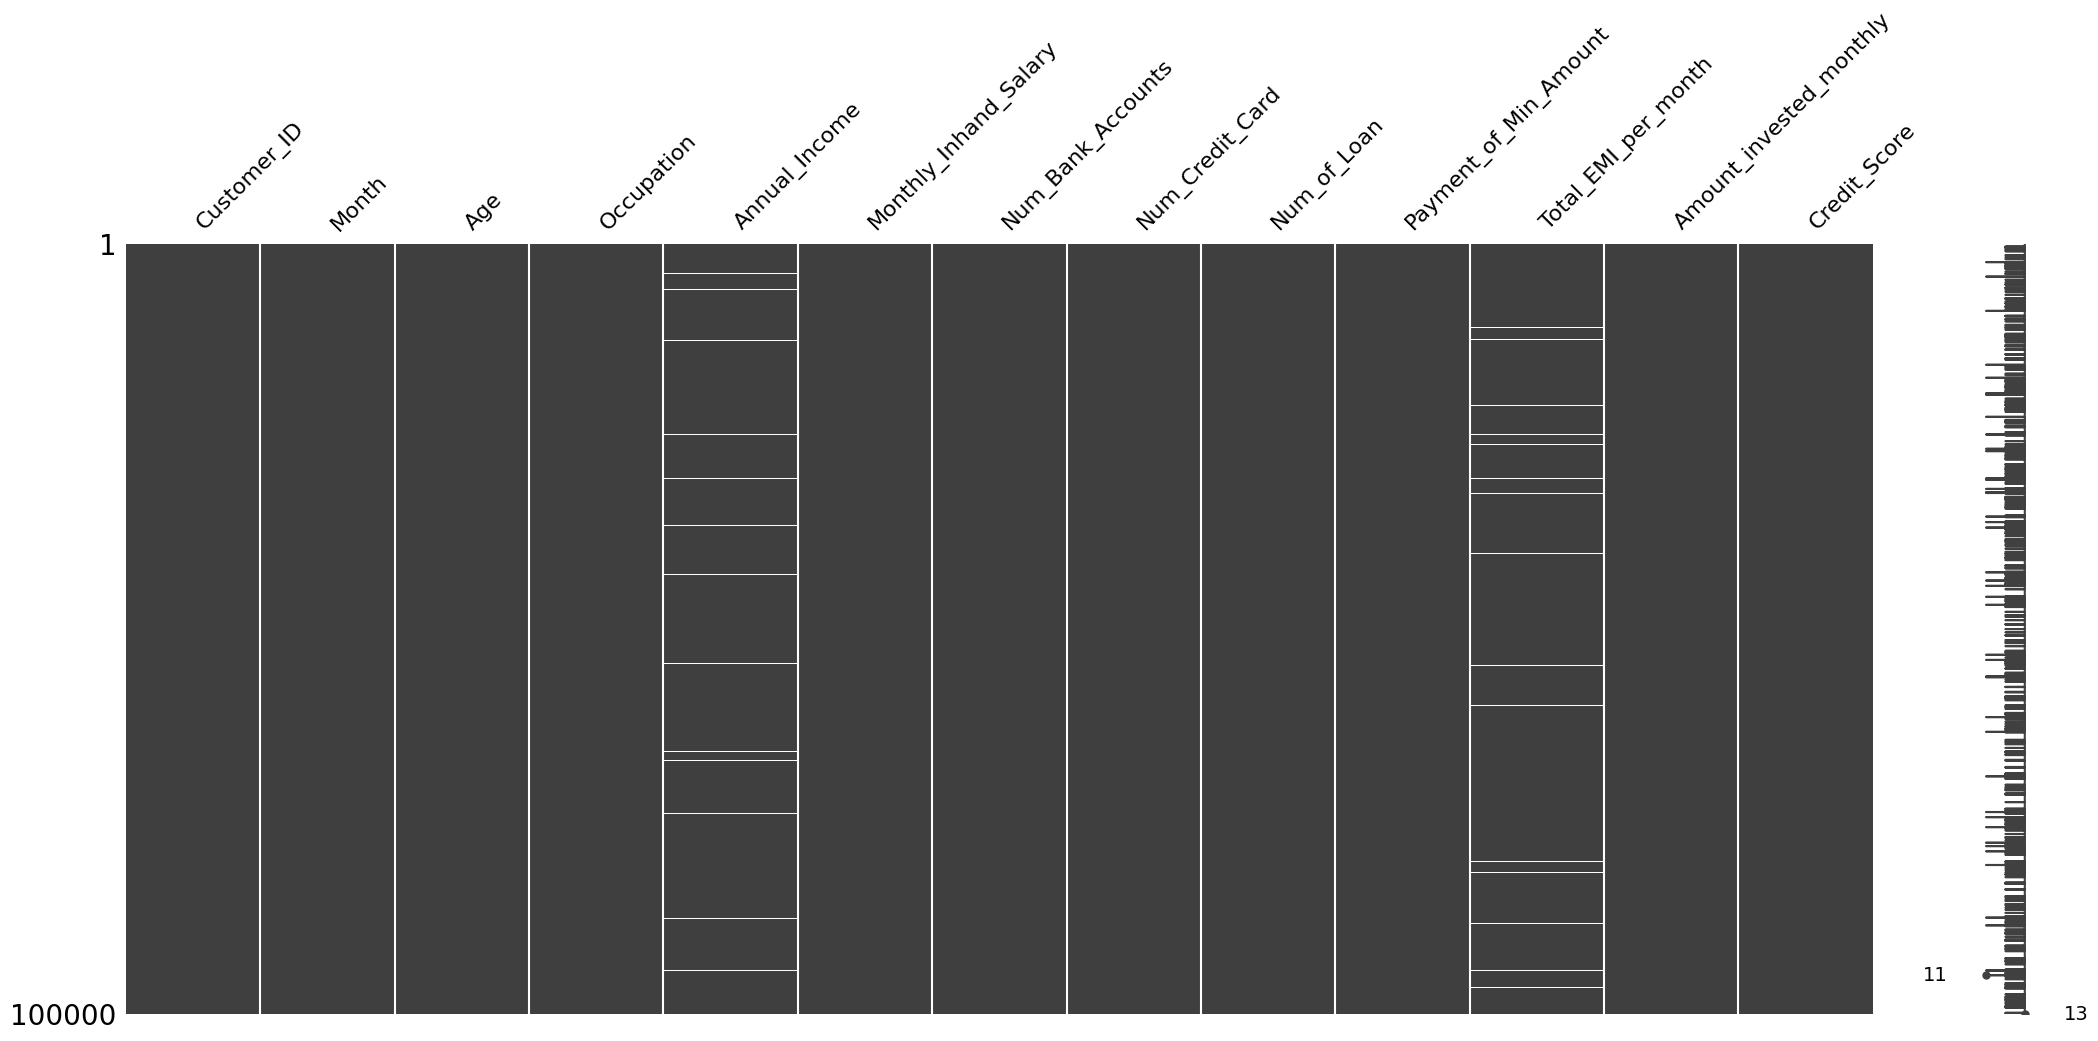

In [26]:
msno.matrix(train_data)

In [27]:
train_data.dropna(inplace=True)

In [28]:
train_data.drop(columns=['Customer_ID'], axis=1, inplace=True)

In [29]:
train_data['Credit_Score'] = train_data['Credit_Score'].map({'Poor':1, 'Standard':2, 'Good':3})

In [30]:
train_data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
ID,,,,,,,,,,,,
0x1602,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,No,49.574949,80.415295,3
0x1603,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,No,49.574949,118.280222,3
0x1604,March,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,No,49.574949,81.699521,3
0x1605,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,No,49.574949,199.458074,3
0x1606,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,No,49.574949,41.420153,3
...,...,...,...,...,...,...,...,...,...,...,...,...
0x25fe9,April,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,2.0,No,35.104023,60.971333,1
0x25fea,May,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,2.0,No,35.104023,54.185950,1
0x25feb,June,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,2.0,No,35.104023,24.028477,1


In [31]:
clean_train_data = train_data.copy()

In [32]:
# Encode month manually

clean_train_data['Month'] = clean_train_data['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [33]:
y = clean_train_data['Credit_Score']
X = clean_train_data.drop(columns=['Credit_Score'], axis=1)

In [34]:
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
categorical_cols

['Occupation', 'Payment_of_Min_Amount']

In [35]:
low_cardinality_categorical_cols = [col for col in X.columns if 
                                    (X[col].dtype == 'object') & 
                                    (X[col].nunique()<4)]
low_cardinality_categorical_cols

['Payment_of_Min_Amount']

In [36]:
high_cardinality_categorical_cols = [col for col in X.columns if 
                                    (X[col].dtype == 'object') & 
                                    (X[col].nunique()>3)]

high_cardinality_categorical_cols

['Occupation']

In [37]:
OH_X = pd.get_dummies(X[low_cardinality_categorical_cols])
OH_X

,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
ID,,,
0x1602,0,1,0
0x1603,0,1,0
0x1604,0,1,0
0x1605,0,1,0
0x1606,0,1,0
...,...,...,...
0x25fe9,0,1,0
0x25fea,0,1,0
0x25feb,0,1,0


In [38]:
ord_encoder = OrdinalEncoder()
ORD_X = pd.DataFrame(ord_encoder.fit_transform(X[high_cardinality_categorical_cols]), index=X[high_cardinality_categorical_cols].index, columns=X[high_cardinality_categorical_cols].columns)
ORD_X

,Occupation
ID,
0x1602,12.0
0x1603,12.0
0x1604,12.0
0x1605,12.0
0x1606,12.0
...,...
0x25fe9,9.0
0x25fea,9.0
0x25feb,9.0


In [39]:
categorical_X = ORD_X.join(OH_X)

In [40]:
# Numerical Cols
numerical_cols = [col for col in X.columns if 
                 (X[col].dtype == 'float64')|
                 (X[col].dtype == 'int64')]

In [41]:
X[numerical_cols].head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Total_EMI_per_month,Amount_invested_monthly
ID,,,,,,,,,
0x1602,1,23.0,19114.12,1824.843333,3.0,4.0,4.0,49.574949,80.415295
0x1603,2,23.0,19114.12,1824.843333,3.0,4.0,4.0,49.574949,118.280222
0x1604,3,23.0,19114.12,1824.843333,3.0,4.0,4.0,49.574949,81.699521
0x1605,4,23.0,19114.12,1824.843333,3.0,4.0,4.0,49.574949,199.458074
0x1606,5,23.0,19114.12,1824.843333,3.0,4.0,4.0,49.574949,41.420153


In [42]:
numerical_X = X[numerical_cols]

In [43]:
cols_for_scaled = ['Annual_Income', 
                   'Monthly_Inhand_Salary',  
                   'Amount_invested_monthly']

scaler = MinMaxScaler()
numerical_scaled_X = pd.DataFrame(scaler.fit_transform(numerical_X[cols_for_scaled]), 
                                  index=numerical_X[cols_for_scaled].index, 
                                  columns=numerical_X[cols_for_scaled].columns)

In [44]:
numerical_X[cols_for_scaled] = numerical_scaled_X

In [45]:
numerical_X

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Total_EMI_per_month,Amount_invested_monthly
ID,,,,,,,,,
0x1602,1,23.0,0.083178,0.120751,3.0,4.0,4.0,49.574949,0.008042
0x1603,2,23.0,0.083178,0.120751,3.0,4.0,4.0,49.574949,0.011828
0x1604,3,23.0,0.083178,0.120751,3.0,4.0,4.0,49.574949,0.008170
0x1605,4,23.0,0.083178,0.120751,3.0,4.0,4.0,49.574949,0.019946
0x1606,5,23.0,0.083178,0.120751,3.0,4.0,4.0,49.574949,0.004142
...,...,...,...,...,...,...,...,...,...
0x25fe9,4,25.0,0.224107,0.242564,4.0,6.0,2.0,35.104023,0.006097
0x25fea,5,25.0,0.224107,0.242564,4.0,6.0,2.0,35.104023,0.005419
0x25feb,6,25.0,0.224107,0.242564,4.0,6.0,2.0,35.104023,0.002403


In [46]:
Final_X = numerical_X.join(categorical_X)

In [47]:
Final_X

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Total_EMI_per_month,Amount_invested_monthly,Occupation,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
ID,,,,,,,,,,,,,
0x1602,1,23.0,0.083178,0.120751,3.0,4.0,4.0,49.574949,0.008042,12.0,0,1,0
0x1603,2,23.0,0.083178,0.120751,3.0,4.0,4.0,49.574949,0.011828,12.0,0,1,0
0x1604,3,23.0,0.083178,0.120751,3.0,4.0,4.0,49.574949,0.008170,12.0,0,1,0
0x1605,4,23.0,0.083178,0.120751,3.0,4.0,4.0,49.574949,0.019946,12.0,0,1,0
0x1606,5,23.0,0.083178,0.120751,3.0,4.0,4.0,49.574949,0.004142,12.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x25fe9,4,25.0,0.224107,0.242564,4.0,6.0,2.0,35.104023,0.006097,9.0,0,1,0
0x25fea,5,25.0,0.224107,0.242564,4.0,6.0,2.0,35.104023,0.005419,9.0,0,1,0
0x25feb,6,25.0,0.224107,0.242564,4.0,6.0,2.0,35.104023,0.002403,9.0,0,1,0


In [48]:
# Imbalance data
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
Final_X, y = smote.fit_resample(Final_X,y)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Final_X,y,test_size=0.20,random_state=500)

# LOGISTIC CLASSIFIER

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_pred_train_lr=lr.predict(x_train)
y_pred_test_lr=lr.predict(x_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [54]:
lr.coef_

array([[-8.19478894e-02, -2.86671684e-02, -9.02562282e-02,
        -8.96266647e-02, -1.97105063e-02,  1.72970368e-01,
         2.35256451e-01, -2.79735798e-03, -1.03462216e-02,
        -1.59141338e-02,  2.36404335e-02, -2.82667026e-01,
         1.83625011e-01],
       [ 1.67598587e-02,  4.37510794e-03,  1.02165736e-02,
         1.14150316e-02,  4.39052913e-02,  1.67018313e-04,
        -3.63697420e-02, -1.04031833e-04,  4.64359422e-04,
         6.04646342e-03,  1.03073221e-01, -2.53107046e-01,
         4.50630283e-01],
       [ 6.51880307e-02,  2.42920604e-02,  8.00396546e-02,
         7.82116331e-02, -2.41947850e-02, -1.73137386e-01,
        -1.98886709e-01,  2.90138981e-03,  9.88186215e-03,
         9.86767037e-03, -1.26713654e-01,  5.35774071e-01,
        -6.34255294e-01]])

In [55]:
lr.intercept_

array([-0.20142074, -0.00775264,  0.20917338])

In [56]:
print(confusion_matrix(y_train,y_pred_train_lr))
print('*'*20)
print(confusion_matrix(y_test,y_pred_test_lr))

[[ 7879 10804  3683]
 [ 6345 21438 13420]
 [ 1102  6703 33259]]
********************
[[2044 2649  933]
 [1548 5291 3358]
 [ 275 1684 8377]]


In [57]:
print(classification_report(y_train,y_pred_train_lr))
print('*'*20)
print(classification_report(y_test,y_pred_test_lr))

              precision    recall  f1-score   support

           1       0.51      0.35      0.42     22366
           2       0.55      0.52      0.53     41203
           3       0.66      0.81      0.73     41064

    accuracy                           0.60    104633
   macro avg       0.57      0.56      0.56    104633
weighted avg       0.59      0.60      0.59    104633

********************
              precision    recall  f1-score   support

           1       0.53      0.36      0.43      5626
           2       0.55      0.52      0.53     10197
           3       0.66      0.81      0.73     10336

    accuracy                           0.60     26159
   macro avg       0.58      0.56      0.56     26159
weighted avg       0.59      0.60      0.59     26159



In [58]:
print(accuracy_score(y_train, y_pred_train_lr))
print("\n")
print(accuracy_score(y_test, y_pred_test_lr))

0.5980522397331626


0.6006345808326007


# DECISION TREE CLASSIFIER

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt_gini=DecisionTreeClassifier(criterion='gini')
dt_entropy=DecisionTreeClassifier(criterion='entropy')
dt_gini.fit(x_train,y_train)
dt_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [61]:
y_pred_g_train=dt_gini.predict(x_train)
y_pred_g_test=dt_gini.predict(x_test)
y_pred_e_train=dt_entropy.predict(x_train)
y_pred_e_test=dt_entropy.predict(x_test)

In [62]:
print(classification_report(y_train,y_pred_g_train))
print("\n")
print(classification_report(y_test,y_pred_g_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22366
           2       1.00      1.00      1.00     41203
           3       1.00      1.00      1.00     41064

    accuracy                           1.00    104633
   macro avg       1.00      1.00      1.00    104633
weighted avg       1.00      1.00      1.00    104633



              precision    recall  f1-score   support

           1       0.71      0.71      0.71      5626
           2       0.76      0.74      0.75     10197
           3       0.88      0.89      0.88     10336

    accuracy                           0.80     26159
   macro avg       0.78      0.78      0.78     26159
weighted avg       0.79      0.80      0.79     26159



In [63]:
print(accuracy_score(y_train,y_pred_g_train))
print("\n")
print(accuracy_score(y_test,y_pred_g_test))
print("\n")
print(accuracy_score(y_train,y_pred_e_train))
print("\n")
print(accuracy_score(y_test,y_pred_e_test))

1.0


0.7950609732787951


1.0


0.7981956496807981


In [64]:
from sklearn.model_selection import cross_val_score
accuracy_train_gini=cross_val_score(dt_gini,X=x_train,y=y_train,cv=15)
accuracy_test_gini=cross_val_score(dt_gini,X=x_test,y=y_test,cv=15)
print(accuracy_train_gini)
print('\n')
print(accuracy_test_gini)

[0.78053326 0.79114106 0.78727064 0.77924312 0.7809633  0.77207569
 0.77666284 0.78583716 0.79569892 0.78007168 0.79268817 0.78078853
 0.77491039 0.79197133 0.79039427]


[0.68119266 0.67947248 0.69610092 0.67373853 0.67603211 0.67201835
 0.67201835 0.68405963 0.69036697 0.67889908 0.67316514 0.66456422
 0.66169725 0.69954128 0.68732071]


In [65]:
from sklearn.model_selection import cross_val_score
accuracy_train_entropy=cross_val_score(dt_entropy,X=x_train,y=y_train,cv=15)
accuracy_test_entropy=cross_val_score(dt_entropy,X=x_test,y=y_test,cv=15)
print(accuracy_train_entropy)
print('\n')
print(accuracy_test_entropy)

[0.79099771 0.79171445 0.7921445  0.79386468 0.78168005 0.78913417
 0.78827408 0.79243119 0.79125448 0.77964158 0.7962724  0.78752688
 0.78293907 0.79455197 0.79283154]


[0.67373853 0.68577982 0.68577982 0.69266055 0.66571101 0.67488532
 0.67316514 0.6766055  0.67947248 0.67029817 0.68176606 0.67545872
 0.67431193 0.68979358 0.6821572 ]


# RANDOM FOREST CLASSIFIER

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500,criterion='gini')
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [67]:
y_pred_rf_train = rf_model.predict(x_train)
y_pred_rf_test = rf_model.predict(x_test)

In [68]:
print(classification_report(y_train,y_pred_rf_train))
print("\n")
print(classification_report(y_test,y_pred_rf_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22366
           2       1.00      1.00      1.00     41203
           3       1.00      1.00      1.00     41064

    accuracy                           1.00    104633
   macro avg       1.00      1.00      1.00    104633
weighted avg       1.00      1.00      1.00    104633



              precision    recall  f1-score   support

           1       0.80      0.80      0.80      5626
           2       0.83      0.82      0.82     10197
           3       0.92      0.94      0.93     10336

    accuracy                           0.86     26159
   macro avg       0.85      0.85      0.85     26159
weighted avg       0.86      0.86      0.86     26159



In [69]:
print(accuracy_score(y_train, y_pred_rf_train))
print("\n")
print(accuracy_score(y_test, y_pred_rf_test))

1.0


0.8608509499598609


In [70]:
from sklearn.model_selection import cross_val_score
accuracy_test = cross_val_score(rf_model, X=x_test, y=y_test, cv = 20)
print(accuracy_test)

[0.77981651 0.7882263  0.76376147 0.76299694 0.76681957 0.76376147
 0.75458716 0.77293578 0.75458716 0.76070336 0.7882263  0.76529052
 0.76452599 0.76834862 0.76452599 0.74923547 0.75152905 0.77599388
 0.77522936 0.75745983]


# KNN CLASSIFIER

In [71]:
x_knn=Final_X

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_knn)
scaled_features=scaler.transform(x_knn)

In [73]:
df_feat=pd.DataFrame(scaled_features,columns=x_knn.columns)
df_feat

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Total_EMI_per_month,Amount_invested_monthly,Occupation,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,-1.542301,-1.019964,-0.879556,-0.798645,-0.718863,-0.564272,0.370872,-0.456276,-0.284240,1.178676,-0.320522,1.133004,-0.828741
1,-1.094250,-1.019964,-0.879556,-0.798645,-0.718863,-0.564272,0.370872,-0.456276,-0.264822,1.178676,-0.320522,1.133004,-0.828741
2,-0.646199,-1.019964,-0.879556,-0.798645,-0.718863,-0.564272,0.370872,-0.456276,-0.283581,1.178676,-0.320522,1.133004,-0.828741
3,-0.198148,-1.019964,-0.879556,-0.798645,-0.718863,-0.564272,0.370872,-0.456276,-0.223193,1.178676,-0.320522,1.133004,-0.828741
4,0.249903,-1.019964,-0.879556,-0.798645,-0.718863,-0.564272,0.370872,-0.456276,-0.304237,1.178676,-0.320522,1.133004,-0.828741
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130787,0.249903,-1.476116,0.189073,0.000313,-0.718863,-0.083680,-1.363557,-1.061929,-0.112541,0.245993,-0.320522,1.133004,-0.828741
130788,1.146005,0.074801,-0.873551,-0.914455,-0.718863,-0.083680,-0.496342,-0.745818,-0.288881,-1.386204,-0.320522,-0.882609,-0.828741
130789,0.697954,0.530953,0.302377,0.269363,-0.718863,-1.725914,-1.363557,-1.061929,-0.184698,-1.619374,-0.320522,-0.882609,-0.828741
130790,0.697954,-0.381351,2.303778,2.357759,-0.718863,-1.044864,-0.496342,0.707454,-0.170282,-0.686691,-0.320522,1.133004,-0.828741


In [74]:
x_knn= df_feat

In [75]:
from sklearn.model_selection import train_test_split
x_train_knn,x_test_knn,y_train,y_test=train_test_split(x_knn,y,train_size=0.75,random_state=555)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_knn,y_train)

KNeighborsClassifier(n_neighbors=10)

In [78]:
y_pred_knn_train=knn.predict(x_train_knn)
y_pred_knn_test=knn.predict(x_test_knn)

In [79]:
print(confusion_matrix(y_train,y_pred_knn_train))
print("\n")
print(confusion_matrix(y_test,y_pred_knn_test))

[[14246  4938  1944]
 [ 6095 26724  5758]
 [  464  3307 34618]]


[[ 4069  2073   722]
 [ 2431  7883  2509]
 [  223  1473 11315]]


In [80]:
print(classification_report(y_train,y_pred_knn_train))
print("\n")
print(classification_report(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

           1       0.68      0.67      0.68     21128
           2       0.76      0.69      0.73     38577
           3       0.82      0.90      0.86     38389

    accuracy                           0.77     98094
   macro avg       0.76      0.76      0.75     98094
weighted avg       0.77      0.77      0.77     98094



              precision    recall  f1-score   support

           1       0.61      0.59      0.60      6864
           2       0.69      0.61      0.65     12823
           3       0.78      0.87      0.82     13011

    accuracy                           0.71     32698
   macro avg       0.69      0.69      0.69     32698
weighted avg       0.71      0.71      0.71     32698



In [81]:
print(accuracy_score(y_train,y_pred_knn_train))
print("\n")
print(accuracy_score(y_test,y_pred_knn_test))

0.770567007156401


0.7115725732460702
